<a href="https://colab.research.google.com/github/riblidezso/wigner_dl_demo/blob/master/nb_01_baby_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Baby steps in deep learning



### Load useful python packages

In [6]:
# plotting and numerical basics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
# machine learning baselines
# https://scikit-learn.org/stable/
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [8]:
# keras deep learning framework (with tensorflow backend)
# https://keras.io
# https://www.tensorflow.org
import keras
from keras.models import Model
import keras.layers as kl
import keras.regularizers as kr
import keras.optimizers as ko

# MNIST handwritten digits dataset

In [9]:
from keras.datasets import mnist
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Check some handwritten digits

Label: 3


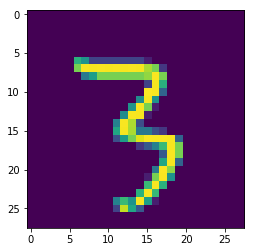

In [11]:
i = 44
imshow(x_train[i])
print('Label:', y_train[i] )

### Some more info about the dataset

In [12]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Normalize pixel values to 0-1 range

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

## Define functions for 'simple' machine learning baselines

In [14]:
def train_baseline(model, x_train, y_train, N_train=60000, **kwargs):
  """Train a baseline sklearn model."""
  x_train_flat = x_train.reshape(x_train.shape[0],-1)  # flatten
  clf = model(**kwargs)  # init machine learning model
  clf.fit(x_train_flat[:N_train],y_train[:N_train])  # train it
  return clf


def test_baseline(clf, x_test, y_test):
  """Evaluate a baseline sklearn model."""
  x_test_flat = x_test.reshape(x_test.shape[0],-1)  # flatten
  y_pred = clf.predict(x_test_flat)  # make predictions
  acc = np.equal(y_pred, y_test).mean()  # calculate accuracy
  print(clf.__class__.__name__, 'accuracy',acc)

### Test logistic regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)

It takes 2-3 minutes, wait!

In [15]:
%%time
clf = train_baseline(LogisticRegression, x_train, y_train)
test_baseline(clf, x_test, y_test)

/home/pal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression accuracy 0.9201
CPU times: user 1min 26s, sys: 329 ms, total: 1min 26s
Wall time: 1min 26s


### Test Random Forest

[Random Forest](https://en.wikipedia.org/wiki/Random_forest)

It takes 2-3 minutes, wait!

In [16]:
%%time
clf = train_baseline(RandomForestClassifier, x_train, y_train,
                    n_jobs=-1, n_estimators = 300)
test_baseline(clf, x_test, y_test)

RandomForestClassifier accuracy 0.9716
CPU times: user 4min 55s, sys: 711 ms, total: 4min 56s
Wall time: 1min 18s


### Test a simple neural network with scikit-learn

It takes 1-2 minutes, wait!

In [19]:
%%time
clf = train_baseline(MLPClassifier, x_train, y_train,activation='logistic') #multilayerperceptron
# logistic is the name of sigmoid func - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
test_baseline(clf, x_test, y_test)

MLPClassifier accuracy 0.9787
CPU times: user 7min 4s, sys: 4min 43s, total: 11min 48s
Wall time: 3min 6s


In [20]:
# see the params
clf

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Implement our own neural network with Keras for more control!

In [21]:
N1 = 100
inp = kl.Input(shape=(28*28,),name='input')  # the input data tensor
x = kl.Dense(N1, activation='relu')(inp)  # first dense layer
x = kl.Dense(10, activation='softmax')(x)  # prediction layer
clf = Model(inputs=inp, outputs=x)  # define the model
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

#van száz darab biased parameter, azért nem 78400 hanem 78500 a paraméterek a második layerben

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Train it
clf.fit(x_train.reshape(x_train.shape[0],-1), y_train, epochs=10,batch_size=256,
        validation_data=(x_test.reshape(x_test.shape[0],-1), y_test))

#256 mintából számoljon gradienst és utána lépjen egyet

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.4701 - acc: 0.8734 - val_loss: 0.2605 - val_acc: 0.9262
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2252 - acc: 0.9364 - val_loss: 0.1893 - val_acc: 0.9443
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1734 - acc: 0.9507 - val_loss: 0.1539 - val_acc: 0.9551
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1419 - acc: 0.9597 - val_loss: 0.1355 - val_acc: 0.9604
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1194 - acc: 0.9664 - val_loss: 0.1209 - val_acc: 0.9649
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1035 - acc: 0.9708 - val_loss: 0.1118 - val_acc: 0.9660
Epoch 7/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.0903 - acc: 0.9745 - val_loss: 0.1057 - val_acc

## Try a larger network? 

In [23]:
N1,N2 = 1024,512
inp = kl.Input(shape=(28*28,),name='input')
x = kl.Dense(N1, activation='relu')(inp)  # first dense layer
x = kl.Dropout(0.25)(x) # kinullázza előző réteg random elemeit, negyedét használja a második réteg az előző réteg 1024 neuronjának
x = kl.Dense(N2, activation='relu')(x)  # first dense layer
x = kl.Dropout(0.25)(x) # így a dropout segít az overfit ellen
x = kl.Dense(10, activation='softmax')(x)  #prediction layers
clf = Model(inputs=inp, outputs=x)
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

# ha túl sok neuron van akkor csak letároljuk a bemenő adatokat és adabázisszerű lesz és nem fog menni új adatokra

#tesztnél nem dropoutolunk, csak tanulásnál

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Train it
clf.fit(x_train.reshape(x_train.shape[0],-1),y_train, epochs=10, batch_size=256,
        validation_data=(x_test.reshape(x_test.shape[0],-1), y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.2657 - acc: 0.9212 - val_loss: 0.1038 - val_acc: 0.9665
Epoch 2/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.1024 - acc: 0.9684 - val_loss: 0.0847 - val_acc: 0.9731
Epoch 3/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.0689 - acc: 0.9781 - val_loss: 0.0690 - val_acc: 0.9787
Epoch 4/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0543 - acc: 0.9825 - val_loss: 0.0719 - val_acc: 0.9774
Epoch 5/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0449 - acc: 0.9852 - val_loss: 0.0549 - val_acc: 0.9823
Epoch 6/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0357 - acc: 0.9884 - val_loss: 0.0767 - val_acc: 0.9764
Epoch 7/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0319 - acc: 0.9893 - val_loss: 0.

# Convolutional neural networks!

In [25]:
# need to create 1 ' color channel'
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#nem lapítjuk le, megtartjuk 28x28asnak, csak 1 csatorna mert 1 színű a kép

In [26]:
N1,N2,N3 = 32,64,128
inp = kl.Input(shape=(28,28,1),name='input')
x = kl.Conv2D(N1, kernel_size=(3, 3), activation='relu')(inp)
x = kl.Conv2D(N1, (3, 3), activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.Conv2D(N2, (3, 3), activation='relu')(x)
x = kl.Conv2D(N2, (3, 3), activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.Dropout(0.25)(x)
x = kl.Flatten()(x)
x = kl.Dense(N3, activation='relu')(x)  # first dense layer
x = kl.Dropout(0.5)(x)
x = kl.Dense(10, activation='softmax')(x)  #prediction layers
clf = Model(inputs=inp, outputs=x)
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [29]:
# Train it

#clf.fit(x_train,y_train, epochs=10, validation_split=0.1, batch_size=256,
#        validation_data = (x_test, y_test))

clf.fit(x_train,y_train, epochs=1, batch_size=256,
        validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0772 - acc: 0.9777 - val_loss: 0.0291 - val_acc: 0.9905


---


# 97.5 or 99.4 meh? Let's see a more impressive example: CIFAR10

2.5% vs 0.6% not so meh btw

[CIFAR10 website](https://www.cs.toronto.edu/~kriz/cifar.html)

In [30]:
from keras.datasets import cifar10
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
mnist_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                 'horse','ship', 'truck']

170500096/170498071 [==============================] - 78s 0us/step


## Test yourself at home! 

I can do around 96%

Label: horse


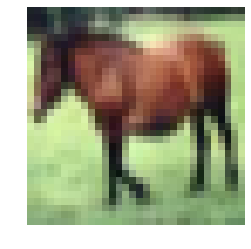

In [31]:
i = 7
imshow(x_train[i])
plt.axis('off')
print('Label:', mnist_classes[ int(y_train[i]) ])

#### Some info

In [32]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### Normalize data

In [33]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

### Baselines

No Logistic regression because it takes forever!

Wait, this also runs form 3-4 minutes!

In [34]:
%%time
clf = train_baseline(RandomForestClassifier, x_train, y_train.flatten(),
                    n_jobs=-1, n_estimators = 100)
test_baseline(clf, x_test, y_test.flatten())

# ez a 46 szazalek nem valami sok, csináljunk inkább konvol hálót, nem azért nem megy mert nem futtattuk elég sokáig azzal amit most csinálunk


RandomForestClassifier accuracy 0.4668
CPU times: user 6min 48s, sys: 636 ms, total: 6min 49s
Wall time: 1min 55s


# OK, so this is much harder. Let's see neural nets!

### First a simple MLP 

In [35]:
N1 = 200
inp = kl.Input(shape=(32*32*3,),name='input')  # the input data tensor
x = kl.Dense(N1, activation='relu')(inp)  # first dense layer
x = kl.Dense(10, activation='softmax')(x)  # prediction layer
clf = Model(inputs=inp, outputs=x)  # define the model
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
print(clf.summary())

# Train it
clf.fit(x_train.reshape(x_train.shape[0],-1), y_train, epochs=10,batch_size=256,
        validation_data=(x_test.reshape(x_test.shape[0],-1), y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2010      
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 131us/step - loss: 2.0159 - acc: 0.2910 - val_loss: 1.8311 - val_acc: 0.3428
Epoch 2/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.7980 - acc: 0.3670 - val_loss: 1.7570 - val_acc: 0.3794
Epoch 3/10
50000/50000 [==============================] - 6s 122us/st

### Maybe a larger one?

In [36]:
N1,N2 = 1024,512
inp = kl.Input(shape=(32*32*3,),name='input')
x = kl.Dense(N1, activation='relu')(inp)  # first dense layer
x = kl.Dropout(0.25)(x)
x = kl.Dense(N2, activation='relu')(x)  # first dense layer
x = kl.Dropout(0.25)(x)
x = kl.Dense(10, activation='softmax')(x)  #prediction layers
clf = Model(inputs=inp, outputs=x)
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
print(clf.summary())

# Train it
clf.fit(x_train.reshape(x_train.shape[0],-1), y_train, epochs=20,batch_size=256,
        validation_data=(x_test.reshape(x_test.shape[0],-1), y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


KeyboardInterrupt: 

## Convolutional, the same as before?

In [ ]:
N1,N2,N3 = 32,64,128
inp = kl.Input(shape=(32,32,3),name='input')
x = kl.Conv2D(N1, kernel_size=(3, 3), activation='relu')(inp)
x = kl.Conv2D(N1, (3, 3), activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.Conv2D(N2, (3, 3), activation='relu')(x)
x = kl.Conv2D(N2, (3, 3), activation='relu')(x)
x = kl.MaxPooling2D(pool_size=(2, 2))(x)
x = kl.Dropout(0.25)(x)
x = kl.Flatten()(x) 
x = kl.Dense(N3, activation='relu')(x)  # first dense layer
x = kl.Dropout(0.5)(x)
x = kl.Dense(10, activation='softmax')(x)  #prediction layers
clf = Model(inputs=inp, outputs=x)
clf.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
           metrics=['accuracy'])
clf.summary()

In [ ]:
# Train it
clf.fit(x_train,y_train, epochs=30, validation_split=0.1, batch_size=256,
        validation_data = (x_test, y_test))

## State of the art is around 97.88% [ArXiv link](https://arxiv.org/abs/1709.01507)


---

# Finally let's implement one of the state of the art networks: [ResNext](https://arxiv.org/abs/1611.05431)

![resnext](https://cdn-images-1.medium.com/max/1600/1*mdiQTfovOXKnqzfj727b9Q.png)


Does not achieve the described results, tell me if you could fix it :) - hol a hiba?

In [ ]:
#!/usr/bin/env python
"""
Train resnext of cifar10.
The implementation follows the FAIR github repo:
https://github.com/facebookresearch/ResNeXt
which is slightly different than the arxiv report.
Here I use the non-preactivation blocks.
The specfic settings (lr,batch size ) can be changed 
to follow the original values (with enough GPUs, and time).
Author: Dezso Ribli
"""

CARDINALITY = 2  # 16
LR = 0.05  # 0.025
BATCH_SIZE = 64  # 32
EPOCHS_DROP = [150,225]
N_EPOCHS = 250
AUG = True

import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Activation
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras import optimizers
import math


def resnext(inp, resxt_block, cardinality=4):
    """Return resnext."""
    # inital conv
    x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(5e-4))(inp)
    x = Activation('relu')(BatchNormalization()(x))
    # residual blocks
    x = resxt_blocks(x, resxt_block, cardinality, 64, 256, 1)
    x = resxt_blocks(x, resxt_block, cardinality, 128, 512, 2)
    x = resxt_blocks(x, resxt_block, cardinality, 256, 1024, 2)
    # classifier
    x = GlobalAveragePooling2D()(x)
    x = Dense(10,activation='softmax')(x)
    model = Model(inputs=inp, outputs=x)
    return model


def resxt_blocks(x, resxt_block, cardinality, n_ch1, n_ch2, init_stride, 
                 n_block=3):
    """Perform same size residual blocks."""
    x_shortcut = Conv2D(n_ch2, (1, 1), strides = init_stride, 
                        padding='same', kernel_regularizer=l2(5e-4))(x)
    x_shortcut = BatchNormalization()(x_shortcut)
    # first block
    x = resxt_block(x, x_shortcut, cardinality, n_ch1, n_ch2, init_stride)
    for i in range(n_block-1):  # the other residual blocks
        x = resxt_block(x, x, cardinality, n_ch1, n_ch2)
    return x  


def resxt_block_b(x, x_shortcut, cardinality, n_ch1, n_ch2, init_stride=1):
    """Perform a residual block."""
    groups=[]
    for i in range(cardinality):
        y = Conv2D(n_ch1, (1, 1), strides=init_stride, 
                   kernel_regularizer=l2(5e-4), padding='same')(x)
        y = Activation('relu')(BatchNormalization()(y))
        y = Conv2D(n_ch1, (3, 3), padding='same', 
                   kernel_regularizer=l2(5e-4),)(y)
        y = Activation('relu')(BatchNormalization()(y))
        groups.append(y)
    x = keras.layers.concatenate(groups)
    x = Conv2D(n_ch2, (1, 1), padding='same', 
               kernel_regularizer=l2(5e-4),)(x)
    x = BatchNormalization()(x)
    x = keras.layers.add([x, x_shortcut])
    x = Activation('relu')(x)
    return x   


def norm(x):
    """Normalize images."""
    x = x.astype('float32')
    x[...,0] = (x[...,0] - x[...,0].mean())/x[...,0].std()
    x[...,1] = (x[...,1] - x[...,1].mean())/x[...,1].std()
    x[...,2] = (x[...,2] - x[...,2].mean())/x[...,2].std()
    return x


def step_decay(epoch, base_lr=LR, drop=0.1, epochs_drops=EPOCHS_DROP):
    """Helper for step learning rate decay."""
    lrate = base_lr
    for epoch_drop in epochs_drops:
        lrate *= math.pow(drop,math.floor(epoch/epoch_drop))
        return lrate



# SGD
sgd = optimizers.SGD(lr=LR, decay=0, momentum=0.9, nesterov=True)

# resnext
res = resnext(Input(shape=(32,32,3)), resxt_block_b, CARDINALITY)
res.compile(loss='sparse_categorical_crossentropy',
            optimizer=sgd, metrics=['accuracy'])
print(res.summary())  # print summary

# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = map(norm, (x_train, x_test))  # normalize

# train on generator with standard data augmentation
gen = ImageDataGenerator(width_shift_range=0.125,
                         height_shift_range=0.125,
                         horizontal_flip=True)
train_generator = gen.flow(x_train, y_train,
                           batch_size=BATCH_SIZE)
# train
res.fit_generator(train_generator, epochs=N_EPOCHS,
                  steps_per_epoch = len(x_train)/BATCH_SIZE,
                  validation_data=(x_test, y_test),
                  callbacks=[LearningRateScheduler(step_decay)])